# Week 9: Project Example

In this mini-project our will goal will be to look at Data published by US Census Bureau about the housing market in California. Given i set of features our goal is to find a model that predicts the median housing price in any district.

Like all seasoned data scientists we start by loading our notebook with the standard toolbox of packages.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

### I - First we frame the problem:

The first task we need to establish is what is the objective of our Machine learning problem. How do we intend to use this data and model in the future. Knowing the objectives is crucial in all the decision we will be taking while building our model. Decisions that relate to anything from how to clean the data to how to evaluate the model.  

Let's assume we are investors and we are trying to undervalued districts. We will use the model to estimate the median bla bla


The first questions we need to answers are: What kind of problem are we looking at?

In this particular case it is obvious that we are dealing with a supervised learning problem that requieres a multivariate regression analysis. 

This said we can still reframe the problem differently at this stage by making the target a price range instead of a median price. In this case we will be dealing with a classification problem.



### II - Get the Data

In [3]:
data_table = pd.read_csv('housing.csv')

In [5]:
data_table.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The content and structure of our dataset looks fairly comprehansible. We can explore the data even more in depth by applying the the .info() method to it.

In [9]:
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Initial observations:

   - The __total_bedrooms__ feature has only 20433 non-values which means we need to deal with those missing vales.
   - All features are numerical and stored as type float64 except __ocean_proximity__. Pandas loaded as type 'Object' which be any Python Object but by compering with the the .head() output we know we are dealing with strings.

In [11]:
data_table['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Next, lets look at the summary of the other features:

In [13]:
data_table.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<IPython.core.display.Javascript object>


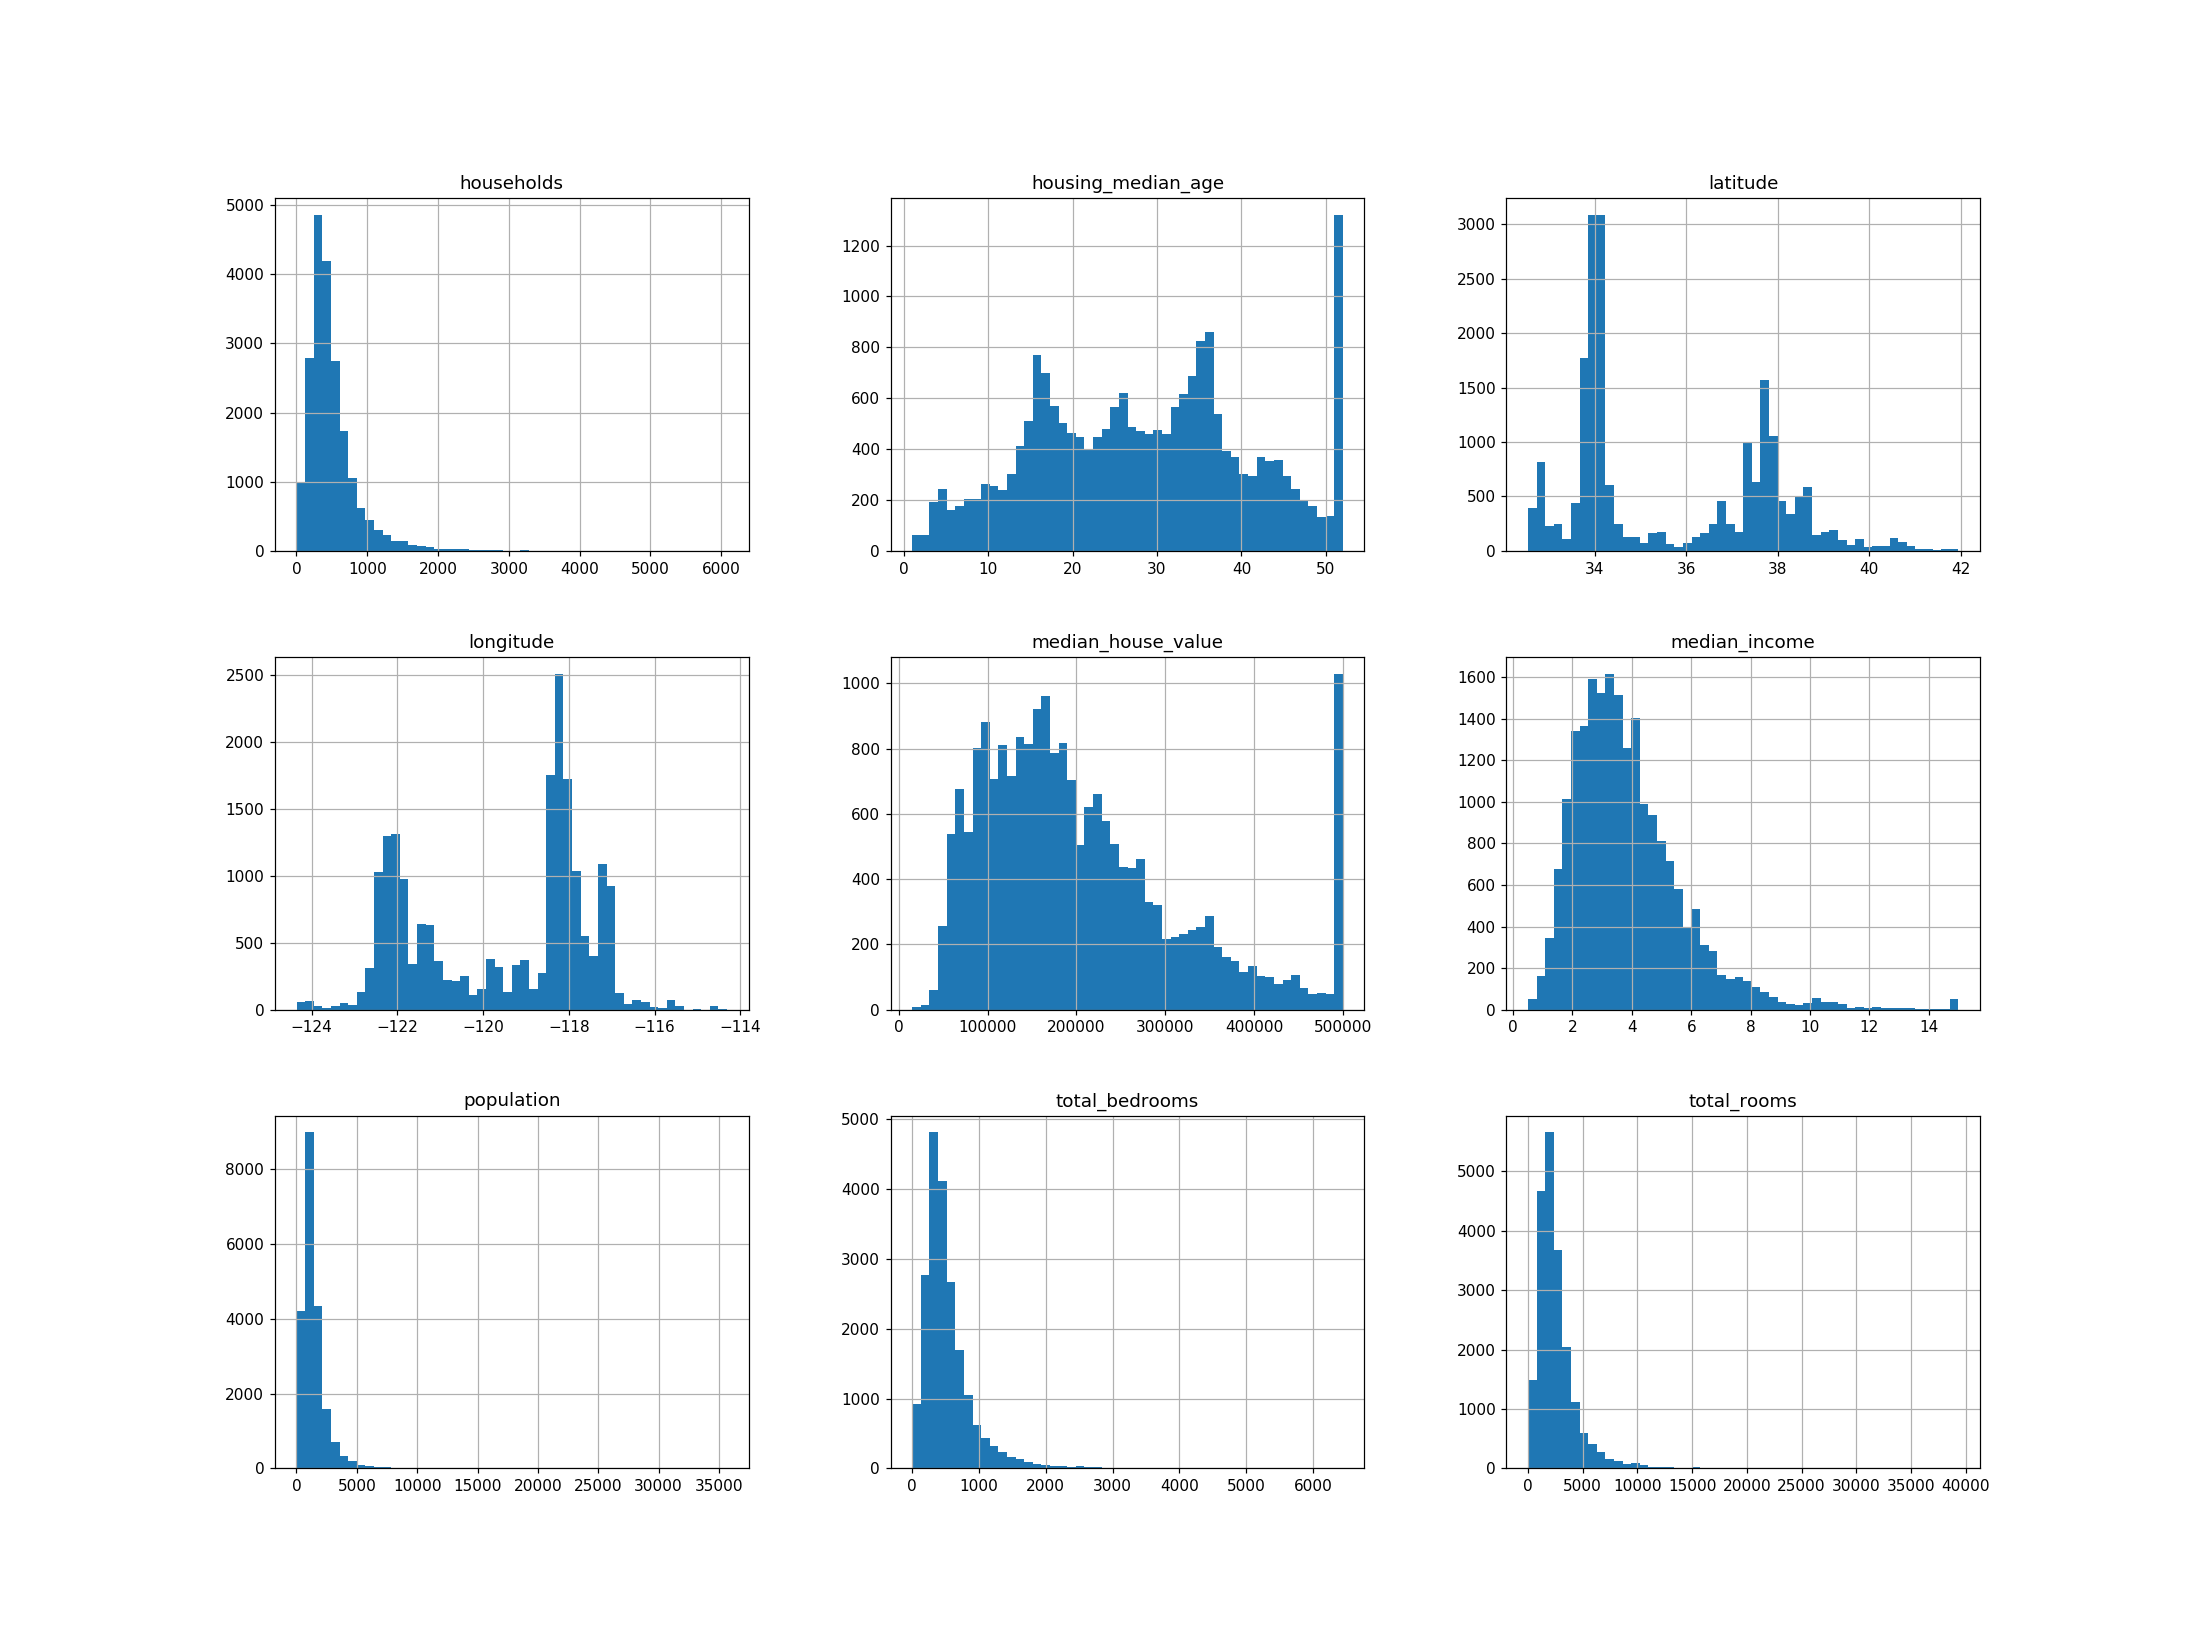

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18fd37f0>,
      dtype=object)

In [21]:

data_table.hist(bins=50, figsize=(20,15))

### To Notice:

- The median income feature does not seem to be expressed in US terms. After checking I realized that the data has been scaled and capped at 15 and the lower side is 0.5. 
- THe housing median age and median house value are also capped. The latter could be a problem since it is our target attribute. This is not ideal, and we need to see how we can fix it. We can't predict properly when the data is capped to 500,000, which means we will wrongly predict houses with value higher than 500k.
- The features in general vary a lot in scale.
- Many features exhibit distribuations that are far from being normal. In fact several have skews. 

### Visualising geographical Data

<IPython.core.display.Javascript object>


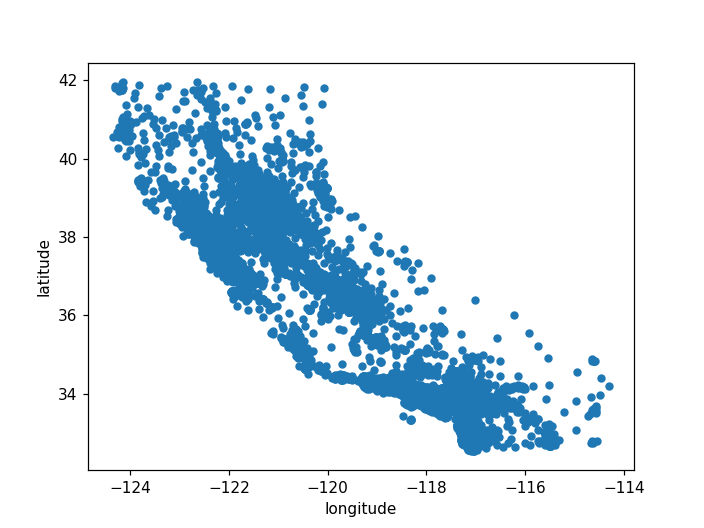

In [23]:
data_table.plot(kind="scatter", x="longitude", y="latitude")


<IPython.core.display.Javascript object>


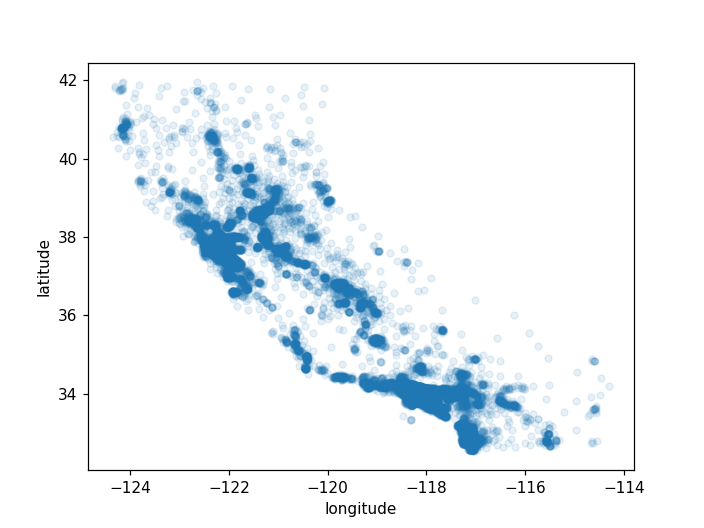

In [25]:
data_table.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

By adding the alpha argument we see a much more nuanced visualision of California, with two concertrated areas around Los Angelos and Central Valley.

Now lets add housing prices to the picture:

<IPython.core.display.Javascript object>


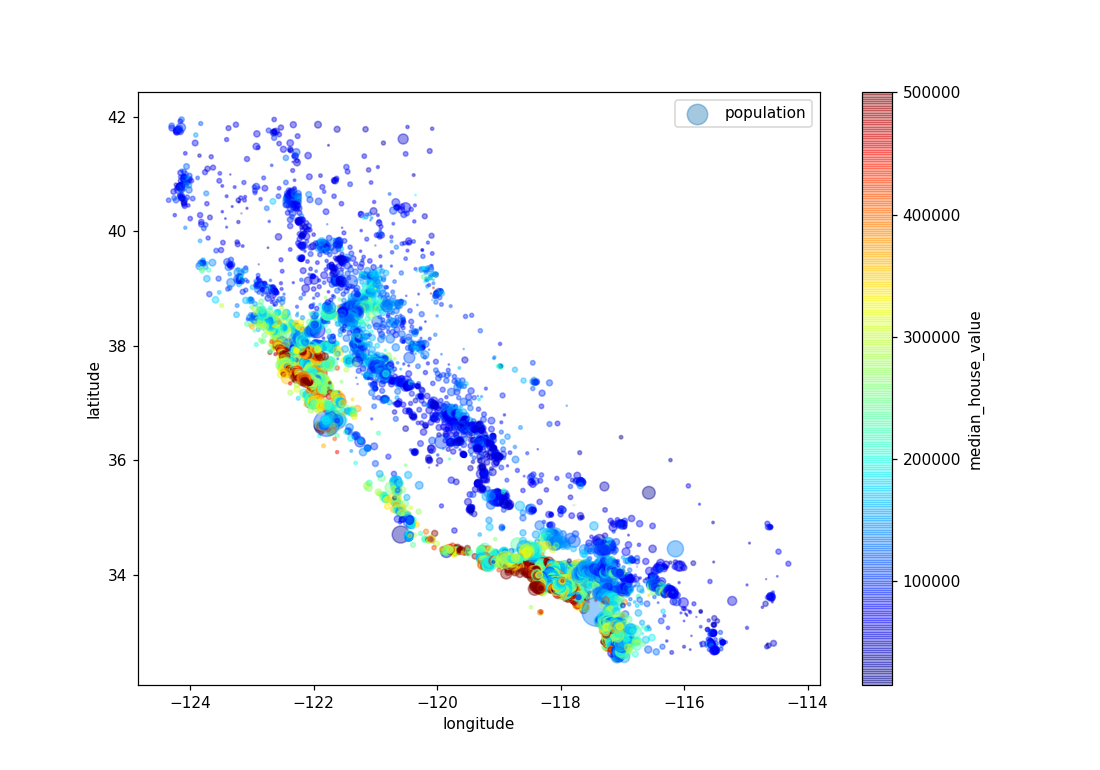

In [27]:
data_table.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data_table["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

### Exploring correlations:

In [29]:
corr_matrix = data_table.corr()

In [30]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [31]:
from pandas.plotting import scatter_matrix

<IPython.core.display.Javascript object>


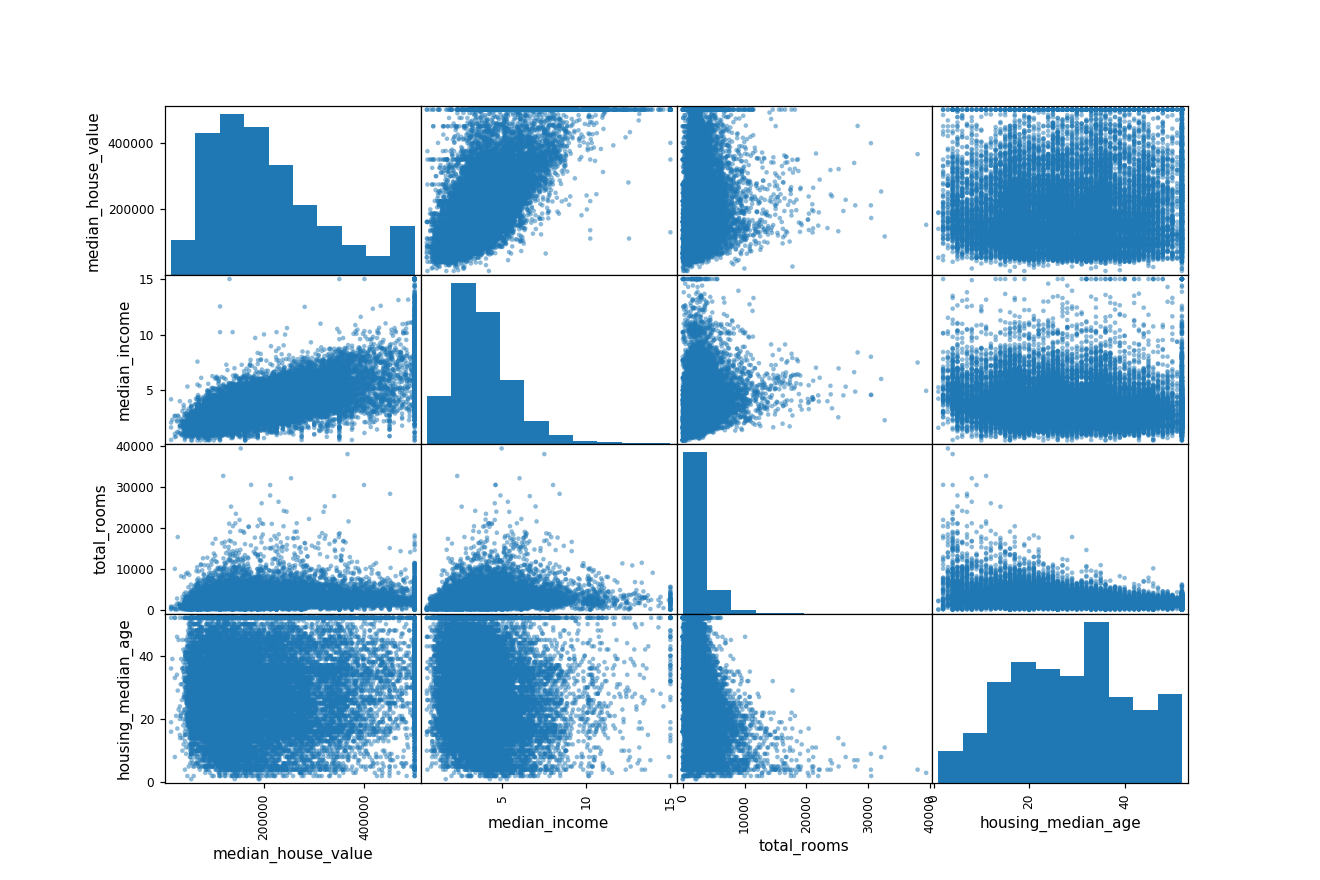

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21398eb8>,
      dtype=object)

In [33]:


attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(data_table[attributes], figsize=(12, 8))

<IPython.core.display.Javascript object>


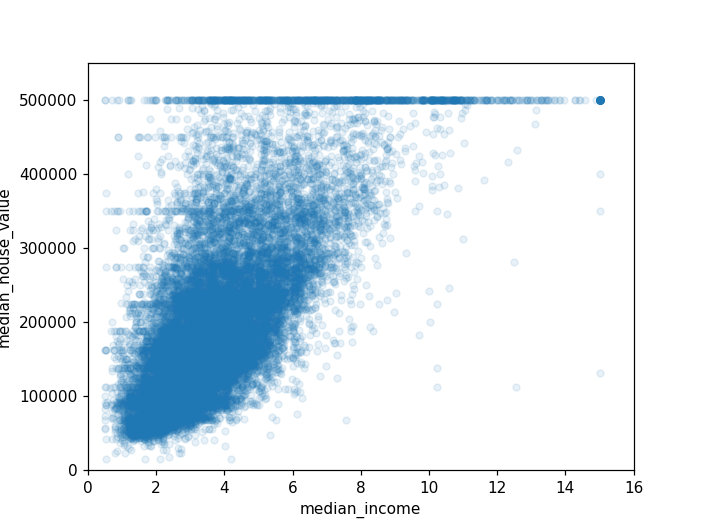

[0, 16, 0, 550000]

In [34]:
data_table.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])


One last thig you might want to think of while preparing your data is to try to combine some features together. For example the total number of rooms in a district is not very usefull if your don't know how many households there are. What you really want is the number of room per household. You also might want to look at bedrooms relative to the number of total rooms. We hence create a couple of new features:

In [36]:
data_table["rooms_per_household"] = data_table["total_rooms"]/data_table["households"]
data_table["bedrooms_per_room"] = data_table["total_bedrooms"]/data_table["total_rooms"]
data_table["population_per_household"]=data_table["population"]/data_table["households"]

In [37]:
corr_matrix = data_table.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

This is type of analysis is not exhaustive. It is just an illustrative example on how to think about your data.

### Prepare the Data for Machine Learning

Let's start by cleaning the data. We have seen earlier that total_bedrooms feature has soem missing value. We have three options to deal with that:

### Missing Data:

- Get rid of the corresponding districts
- Get rid of the whole feature
- Set the values to some value(mean, median, zero..etc)


For each option pandas offers a function: 

In [40]:
sample_incomplete_rows = data_table[data_table.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727


In [41]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household


In [42]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727


In [45]:
median = data_table["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [47]:
data_table["total_bedrooms"].fillna(median, inplace=True)

We opt for the third method. 

### Categorical Features:

In [53]:
housing_cat = data_table[["ocean_proximity"]]


In [54]:
housing_cat

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


Most Machine learning algorithims work only with number. Hence we need to transform those categories to numbers:

We this we will use the SKlearn calss called OrdinalEncoder.

In [64]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded = pd.DataFrame(housing_cat_encoded, columns="Category")

TypeError: Index(...) must be called with a collection of some kind, 'Category' was passed

What is the problem with this encoding?

In [60]:
housing_cat_encoded

,0
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0
5,3.0
6,3.0
7,3.0
8,3.0
9,3.0
